# **Multiple Linear Regression**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [ ]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# **Data PreProcessing**

In [ ]:
original_data = df.shape
df.duplicated() #  The first occurrence is set on False and all others on True.

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [ ]:
data = df.drop_duplicates()
duplicate = data.shape

In [ ]:
print(f"The original DataSet has {original_data} rows and columns where the data set after droping duplicates is {duplicate}. ")

The original DataSet has (4340, 8) rows and columns where the data set after droping duplicates is (3577, 8). 


In [ ]:
pd.isnull(data).any() # returns 'True' if there are any missing values in column

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [ ]:
total_null = data.isnull().sum().sum()
print(f'The total null values: {total_null}')

The total null values: 0


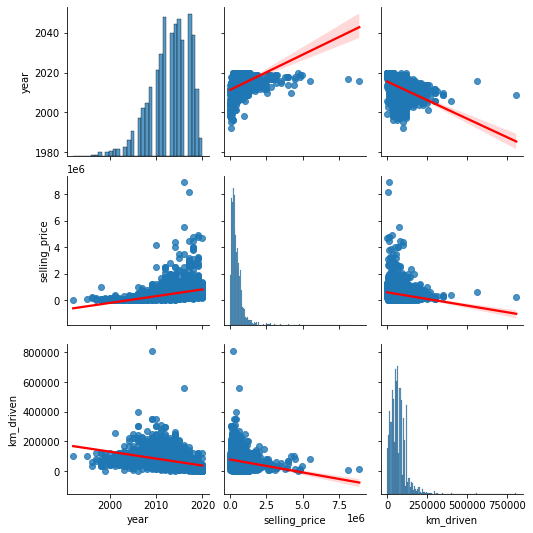

In [ ]:
sns.pairplot(data, kind="reg", plot_kws={'line_kws':{'color':'red'}})

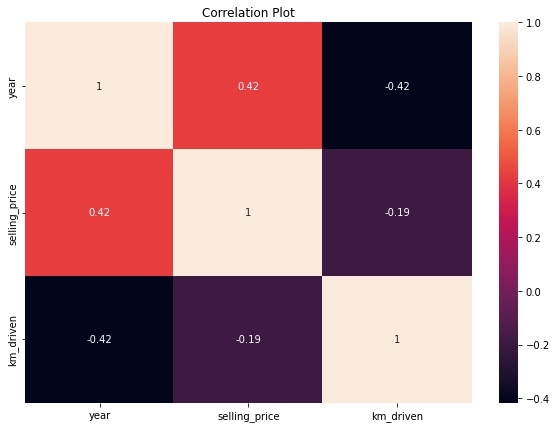

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Correlation Plot')
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data_d = data

In [ ]:
Q1 = data_d.quantile(0.25)
Q3 = data_d.quantile(0.75)
IQR = Q3 - Q1
data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_d['fuel'] = labelencoder.fit_transform(data_d['fuel'])
data_d['seller_type'] = labelencoder.fit_transform(data_d['seller_type'])
data_d['transmission'] = labelencoder.fit_transform(data_d['transmission'])
data_d['owner'] = labelencoder.fit_transform(data_d['owner'])
one_hot_data = pd.get_dummies(df,columns = ['name'])
one_hot_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,...,name_Volkswagen Vento Diesel Trendline,name_Volkswagen Vento IPL II Diesel Trendline,name_Volkswagen Vento Magnific 1.6 Highline,name_Volkswagen Vento New Diesel Highline,name_Volkswagen Vento Petrol Highline,name_Volkswagen Vento Petrol Highline AT,name_Volvo V40 D3 R Design,name_Volvo XC 90 D5 Inscription BSIV,name_Volvo XC60 D3 Kinetic,name_Volvo XC60 D5 Inscription
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Normalizing the Data Set**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_2 = np.array(data_d['km_driven']).reshape(-1,1)
scaler_1 = MinMaxScaler()
scaler_1.fit(X_2)
X_2_scaled = scaler_1.transform(X_2) 
data_d['km_driven'] = X_2_scaled.reshape(1, -1)[0]
data_d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,0.411761,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,0.294113,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,0.588233,1,1,1,0
3,Datsun RediGO T Option,2017,250000,0.270584,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,0.829411,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,0.470585,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,0.470585,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,0.488232,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,0.529409,1,1,1,0


**Testing and Traning**

In [ ]:
Y = data_d['selling_price']
X = data_d[['fuel','km_driven','seller_type','year','owner','transmission']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
output = data_d['selling_price']

In [ ]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = regression.predict(x_test)
train_score_1 = regression.score(x_train,y_train)
test_score_1 = r2_score(y_test,y_predict)

In [ ]:
train_score_1,test_score_1

(0.5154941035141426, 0.5191099117394493)

In [ ]:
regression.coef_

array([ -52920.70853859, -111691.03477595,  -24300.06074878,
         33629.16982194,   -4545.11076862, -196203.31249227])

In [ ]:
polyreg=make_pipeline(PolynomialFeatures(1),LinearRegression())
polyreg.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [ ]:
score = round(regression.score(x_train, y_train),2)
r2score = round(r2_score(y_test, polyreg.predict(x_test)),4)
print(f"The Training Score: {score} ")
print(f"R2_score: {r2score}")

The Training Score: 0.52 
R2_score: 0.5191
